In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os
import sklearn

from statsmodels.stats.weightstats import ttest_ind
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pygad

In [2]:
RawData = pd.read_csv("train.csv").drop("ID", axis = 1)

RawData.head(10)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


## Basic EDA

In [3]:
## Let's do a mean comparison between the two classes

class_incidence = np.mean(RawData["TARGET"])

print(f"The incidence of the outcome is {np.round(class_incidence,2)}")

means_by_class = RawData.groupby("TARGET").mean().T.round(2)
means_by_class["pvalue"] = None
for rw in range(means_by_class.shape[0]):
    var_name = means_by_class.index.values[rw]
    test_results = ttest_ind(RawData[RawData["TARGET"]==1][var_name], RawData[RawData["TARGET"]==0][var_name])
    means_by_class.loc[var_name,"pvalue"] = round(test_results[1],2)

means_by_class["is_significant"] = means_by_class["pvalue"] < 0.01

with pd.option_context("display.max_rows", 1000): 
    display(means_by_class)
## Everything seems to be significantly predictive except for amount

The incidence of the outcome is 0.04


TARGET,0,1,pvalue,is_significant
var3,-1558.65,-662.67,0.22,False
var15,32.95,39.68,0.0,True
imp_ent_var16_ult1,86.21,86.07,1.0,False
imp_op_var39_comer_ult1,71.65,89.67,0.0,True
imp_op_var39_comer_ult3,119.14,128.99,0.33,False
imp_op_var40_comer_ult1,3.50,4.99,0.39,False
imp_op_var40_comer_ult3,6.48,6.20,0.92,False
imp_op_var40_efect_ult1,0.29,3.31,0.0,True
imp_op_var40_efect_ult3,0.42,4.16,0.0,True
imp_op_var40_ult1,3.10,4.61,0.39,False


In [4]:
## Remove variables that show no variance
good_inputs = means_by_class[means_by_class["pvalue"] != np.nan].index.values.tolist()

## Data Processing

In [5]:
## Split our data
X = RawData[good_inputs]
y = RawData.loc[:, RawData.columns == "TARGET"]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 97)

#use xgboost API now
xgDMatrix_Total = xgb.DMatrix(X, y)
xgDMatrix_Train = xgb.DMatrix(X_train, y_train)
xgDMatrix_Test = xgb.DMatrix(X_test, y_test)

eval_set = [(X_train, y_train), (X_test, y_test)]

## Baseline XGBoost

In [6]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': ['auc','error'],
    'tree_method':'hist',
    'max_depth': 5,
    'device': 'cuda'
}

evallist = [(xgDMatrix_Test, 'Test'), (xgDMatrix_Train, 'Train')]

In [7]:
evals_result = {}
Model = xgb.train(params = params,
                  dtrain = xgDMatrix_Train,
                  num_boost_round=100,
                  evals=evallist,
                  evals_result=evals_result, 
                  obj=None,
                  verbose_eval=100)

[0]	Test-auc:0.81248	Test-error:0.03992	Train-auc:0.82701	Train-error:0.03948
[99]	Test-auc:0.82247	Test-error:0.04006	Train-auc:0.91450	Train-error:0.03553


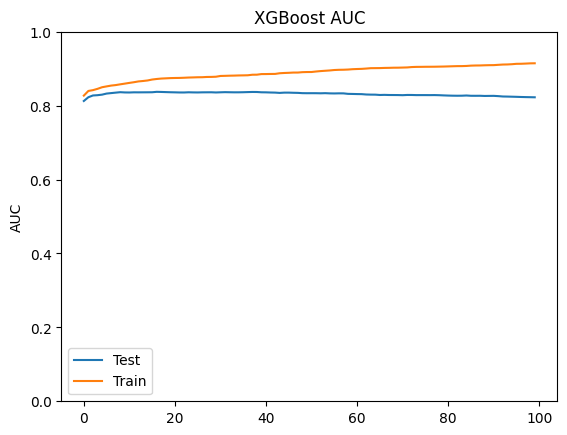

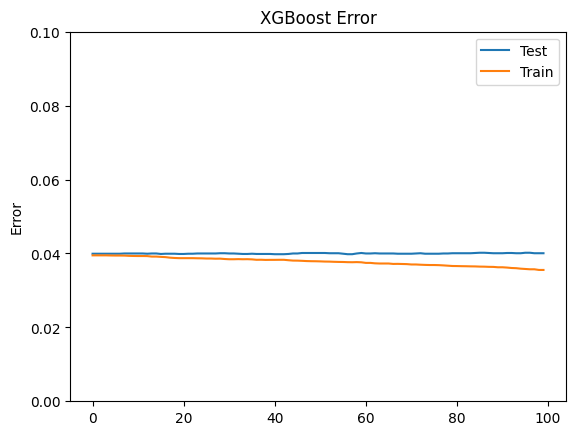

In [8]:
epochs = len(evals_result['Test']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.set(ylim=(0, 1))
ax.plot(x_axis, evals_result['Test']['auc'], label='Test')
ax.plot(x_axis, evals_result['Train']['auc'], label='Train')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')

fig, ax = plt.subplots()
ax.set(ylim=(0, .1))
ax.plot(x_axis, evals_result['Test']['error'], label='Test')
ax.plot(x_axis, evals_result['Train']['error'], label='Train')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Error')
plt.show()

## Using Genetic Algorithm to Optimize Model

In [9]:
######################
## Fitness Function ##
######################

## Let's optimize following parameters:
# learning_rate
# max_depth
# min_child_weight
# gamma 
# colsample_bytree
# scale_pos_weight
# n_estimators

def fitness_func(ga_instance, solution, solution_idx):

    params = {'objective': 'binary:logistic',
              'eval_metric': ['auc','error'],
              'tree_method':'hist',
              'device': 'cuda',
              "learning_rate" : solution[0],
              "max_depth" : solution[1],
              "min_child_weight" : solution[2],
              "gamma": solution[3],
              "colsample_bytree" : solution[4],
              "scale_pos_weight": solution[5]}

    cv_model = xgb.cv(
        params = params,
        dtrain = xgDMatrix_Train,
        num_boost_round=solution[6],
        nfold=5,
        metrics={"auc"},
        seed=0,
        verbose_eval=None
    )
        
    performance = cv_model['train-auc-mean'].iloc[-1]

    return performance

In [10]:
## Set up Genetic Algorithm
num_generations = 50
num_parents_mating = 3

sol_per_pop = 20
num_genes = 7

gene_space = [np.arange(0.05,0.30,0.05).tolist(),
              range(3,15,1),
              range(1,7,1),
              np.arange(0,0.4,0.5).tolist(),
              np.arange(0.3,0.9,0.1).tolist(),
              range(5,1000,50),
              range(100,1500,100)]

gene_type = [float, int, int, float, float, int, int]

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

## For Monitoring
def on_gen(ga_instance):
    print("Generation: ", ga_instance.generations_completed)
    print("Fitness of the best solution:", np.round(ga_instance.best_solution()[1],3))
    print("best solution:", ga_instance.best_solution()[0])
    print("")

In [11]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       gene_type=gene_type,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       on_generation=on_gen,
                       mutation_percent_genes=mutation_percent_genes)

In [12]:
ga_instance.run()

Generation:  1
Fitness of the best solution: 0.998
best solution: [0.25 14 2 0.0 0.8000000000000003 205 1300]

Generation:  2
Fitness of the best solution: 0.998
best solution: [0.25 14 2 0.0 0.8000000000000003 205 1300]

Generation:  3
Fitness of the best solution: 0.999
best solution: [0.25 14 2 0.0 0.9000000000000001 205 1300]

Generation:  4
Fitness of the best solution: 0.999
best solution: [0.25 14 2 0.0 0.9000000000000001 205 1400]

Generation:  5
Fitness of the best solution: 0.999
best solution: [0.25 14 2 0.0 0.9000000000000001 205 1400]

Generation:  6
Fitness of the best solution: 0.999
best solution: [0.25 14 1 0.0 0.9000000000000001 205 1400]

Generation:  7
Fitness of the best solution: 0.999
best solution: [0.25 14 1 0.0 0.9000000000000001 355 1400]

Generation:  8
Fitness of the best solution: 0.999
best solution: [0.25 14 1 0.0 0.9000000000000001 355 1400]

Generation:  9
Fitness of the best solution: 0.999
best solution: [0.25 14 1 0.0 0.9000000000000001 355 1400]

G


KeyboardInterrupt

